<a href="https://colab.research.google.com/github/shivam0070/Health-Insurance-Cross-Sell-Prediction/blob/main/Health_Insurance_Cross_Sell_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Health Insurance Cross Sell Prediction

**Predict Health Insurance Owners' who will be interested in Vehicle Insurance**


Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the customers from past year will also be interested in Vehicle Insurance provided by the company.



**Objective**

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

# 1. Prepare the problem

**Importing Required Libreries**

In [42]:
 #import libraries
import pandas  as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,confusion_matrix,roc_auc_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

sns.set_theme(style="darkgrid")


from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Load dataset**

In [3]:
data=pd.read_csv("/content/drive/MyDrive/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION.csv")


# 2. Summarize Data  



In [4]:
#showing first 5 rows
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
# showing last 5 rows
data.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0
381108,381109,Male,46,1,29.0,0,1-2 Year,No,41777.0,26.0,237,0


In [6]:
# check datatypes, shape,null values
print(data.info())
print()
print(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB
None

id                      0
Gender                  0
Age                     0
Driving_Licens

In [7]:
#Statistical Summary of Numeric Variables
data.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


**Data visualizations**

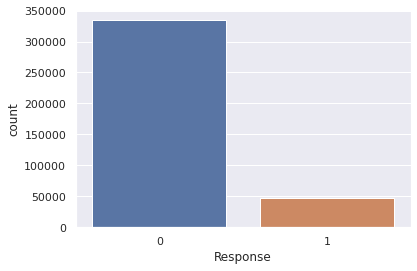

In [8]:
sns.set_theme(style="darkgrid")
sns.countplot(data['Response'],data=data)


The data is highly imbalanced.

**Gender**

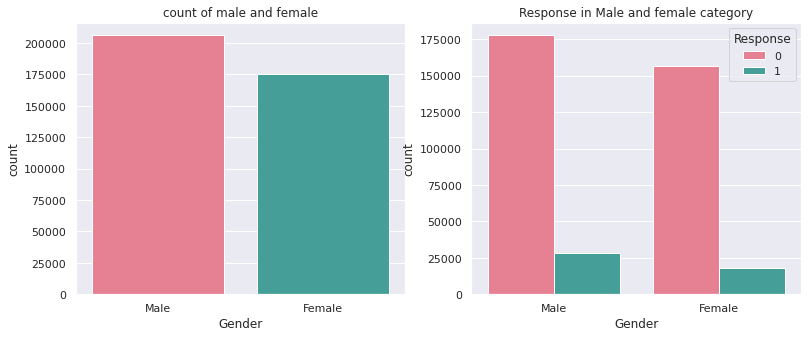

In [9]:
plt.figure(figsize = (13,5))
plt.subplot(1,2,1)
sns.countplot(data['Gender'],palette='husl')
plt.title("count of male and female")
plt.subplot(1,2,2)
sns.countplot(data['Gender'], hue = data['Response'],palette="husl")
plt.title("Response in Male and female category")
plt.show()



*The gender variable in the dataset is almost equally distributed.
* Male category is slightly greater than that of female and chances of buying the insurance is also little high.



**Age Vs Response**

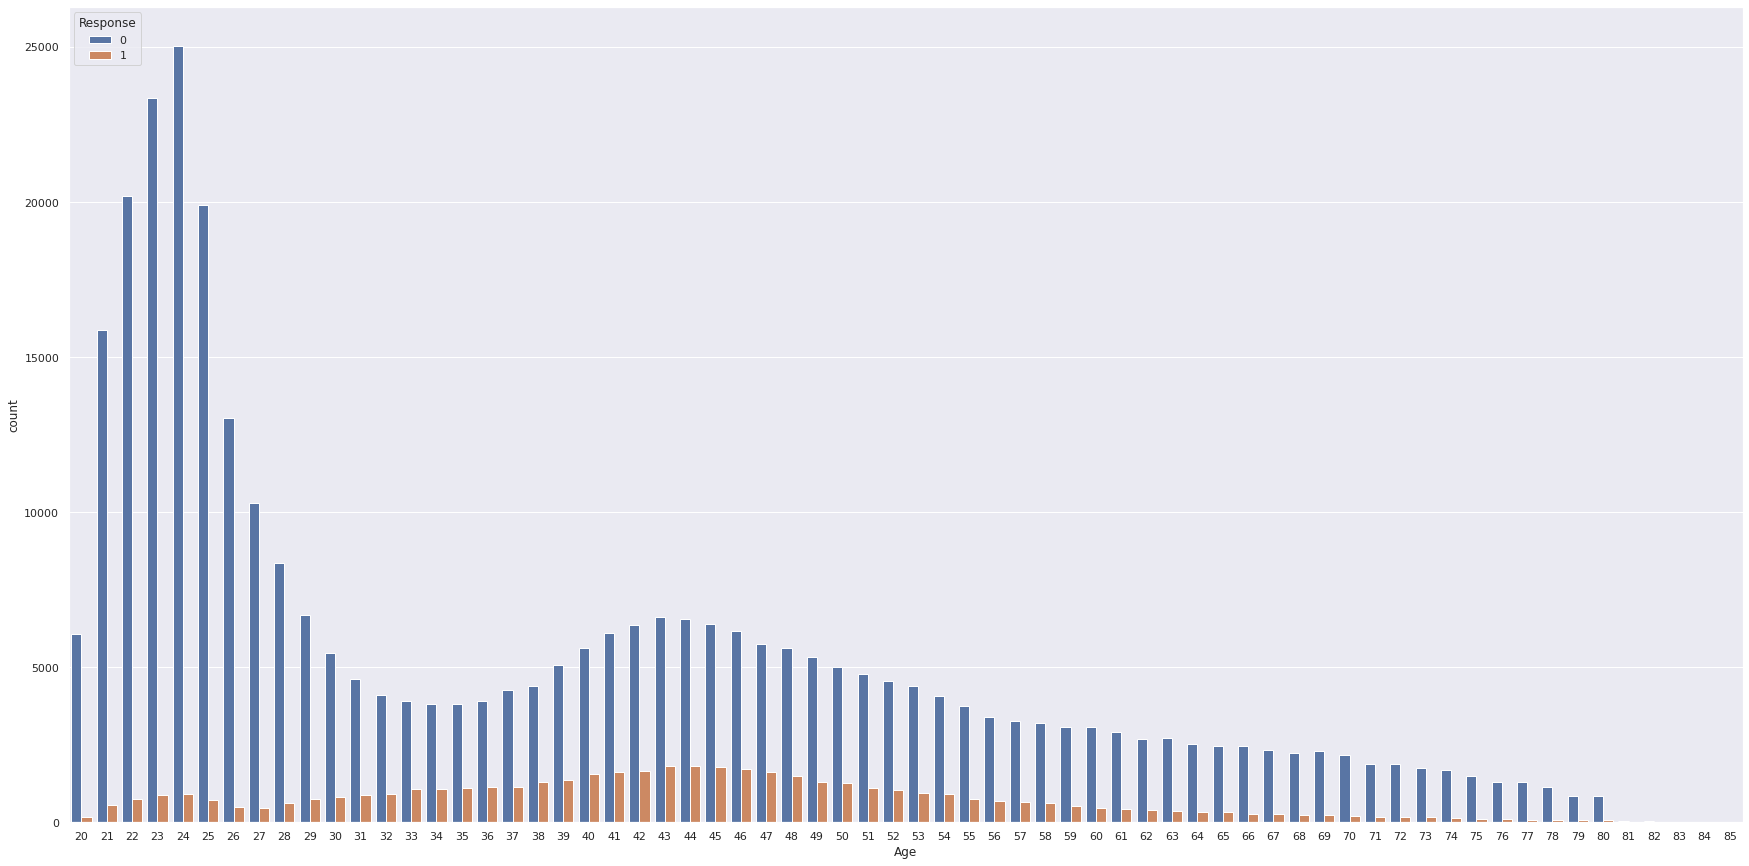

In [10]:
#Age VS Response
plt.figure(figsize=(30,15))
sns.countplot(x='Age',hue='Response',data=data)

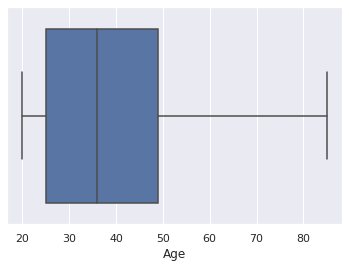

In [11]:
sns.boxplot(data['Age'])



* Young people below 30 are not interested in vehicle insurance. Reasons could be lack of experience, less maturity level and they don't have expensive vehicles yet.

*   People aged between 30-60 are more likely to be interested.
* From the boxplot we can see that there no outlier in the data.


 



**Driving License**

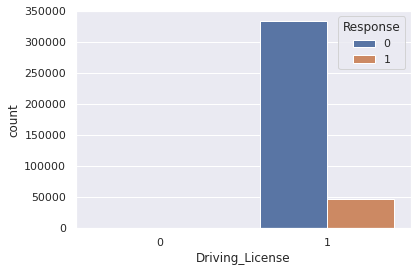

In [12]:
sns.countplot(data['Driving_License'],hue=data['Response'])



*  Customers who are interested in Vehicle Insurance almost all have driving license
 



**Previously_Insured Vs Response**

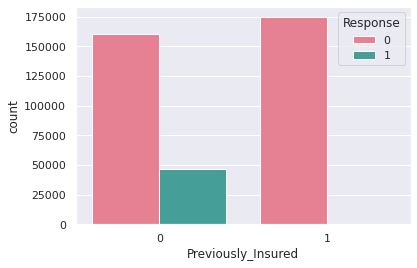

In [13]:
sns.countplot(x='Previously_Insured',hue='Response',data=data,palette='husl')



*   Customer who are not perviosly insured are likely to be inetrested
 



**Vehicle_Age Vs Response**

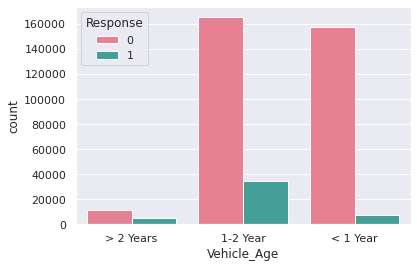

In [14]:
sns.countplot(x='Vehicle_Age',hue='Response',data=data,palette='husl')



* Customers with vechicle age 1-2 years are more likely to interested as compared to the other two
*   Customers with with Vehicle_Age <1 years have very less chance of buying Insurance



**Annual_Premium**

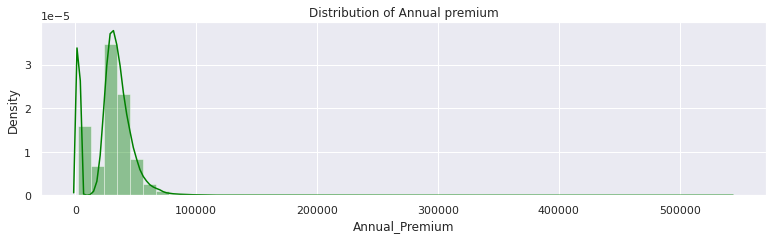

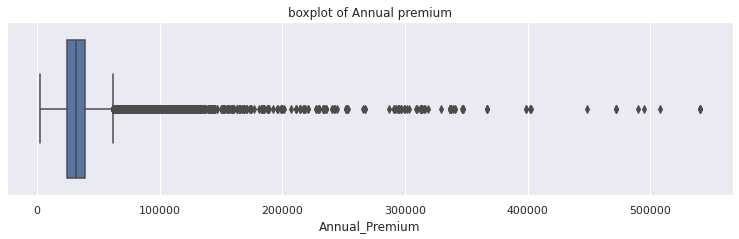

In [15]:
plt.figure(figsize=(13,7))
plt.subplot(2,1,1)
sns.distplot(data['Annual_Premium'], color='green')
plt.title("Distribution of Annual premium")
plt.show()
plt.figure(figsize=(13,7))
plt.subplot(2,1,2)
sns.boxplot(data['Annual_Premium'])
plt.title("boxplot of Annual premium")
plt.show()



*   From the distribution plot we can infer that the annual premimum variable is right skewed
*From the boxplot we can observe lot of outliers in the variable



**Correlation Matrix**

Text(0.5, 1.05, 'Pearson correlation of Features')

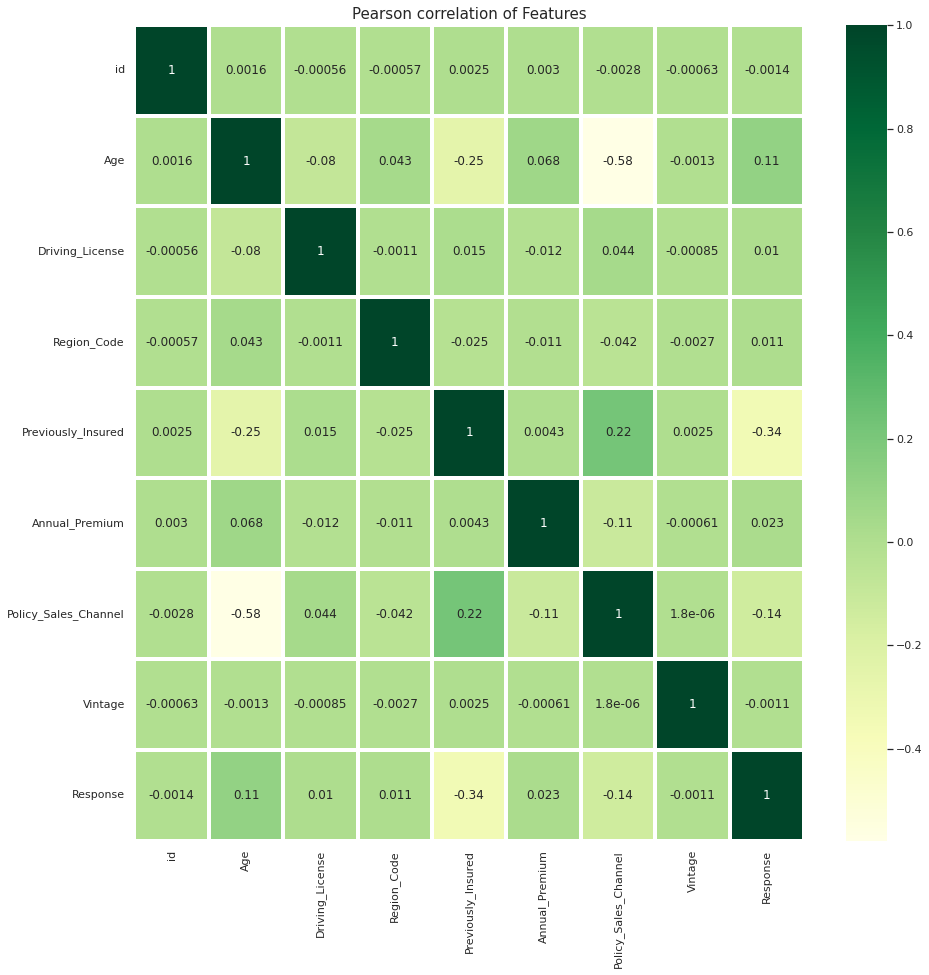

In [16]:
corr = data.corr()

f, ax = plt.subplots(figsize=(15,15))

sns.heatmap(corr, ax=ax, annot=True,linewidths=3,cmap='YlGn')

plt.title("Pearson correlation of Features", y=1.05, size=15)



*   Target variable is not much affected by Vintage variable. we can drop least correlated variable.
 



# 3. Prepare Data

**Label encoding**

In [17]:
#changing categorical value to numerical values
labelEncoder= LabelEncoder()
data['Gender'] = labelEncoder.fit_transform(data['Gender'])
data['Vehicle_Age'] = labelEncoder.fit_transform(data['Vehicle_Age'])
data['Vehicle_Damage'] = labelEncoder.fit_transform(data['Vehicle_Damage'])

In [18]:
data.dtypes

id                        int64
Gender                    int64
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age               int64
Vehicle_Damage            int64
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

Checking duplicate rows

In [19]:
duplicate=data[data.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [id, Gender, Age, Driving_License, Region_Code, Previously_Insured, Vehicle_Age, Vehicle_Damage, Annual_Premium, Policy_Sales_Channel, Vintage, Response]
Index: []




* there is no duplicated rows in the dataset
 



**Seprating dependent and independent variables**

In [20]:
#contain all  independent variable
x=data.drop(['Response'],axis=1)  
y=data['Response']   

**Feature Selection**

[0.19286671 0.00579376 0.13949889 0.00046481 0.09505947 0.05464548
 0.01527325 0.0774192  0.16369467 0.06869711 0.18658666]


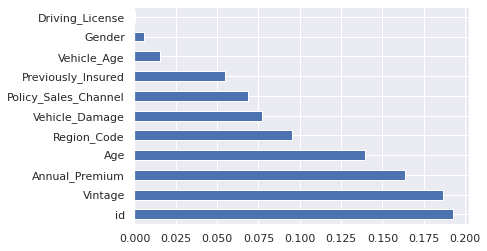

In [21]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based clas
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(11).plot(kind='barh')
plt.show()



*  We can remove less important features from the data set
 



In [22]:
x=x.drop(['Driving_License','Gender'],axis=1)

**Handling Imbalanced data**



*   When observation in one class is higher than the observation in other classes then there exists a class imbalance. We can clearly see that there is a huge difference between the data set. Solving this issue we use resampling technique.
 



Original dataset shape Counter({0: 334399, 1: 46710})
Resampled dataset shape Counter({0: 46710, 1: 46710})


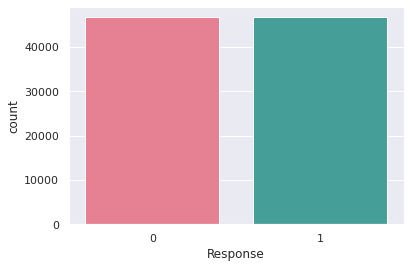

In [27]:
train = RandomUnderSampler(random_state=42, replacement=True)
x_train, y_train = train.fit_resample(data.iloc[:,0:-1], data['Response'])

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))
sns.countplot(y_train,palette='husl')

In [28]:
#dividing the dataset into training and testing
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=.30,random_state=0)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

#feature scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
xtrain=scaler.fit_transform(xtrain)
xtest=scaler.transform(xtest)


(65394, 11) (28026, 11) (65394,) (28026,)


# 4. Model Selection



*  Problem can be identified as Binary Classification (wheather customer opts for vehicle insurance or not)

*  Dataset has more than 300k records
*cannot go with SVM Classifier as it takes more time to train as dataset increase

*  Idea is to start selection of models as:

 1.Logistic Regression

 2.Random Forest

 3.XGBClassifier



**1.Logistic Regression**

In [29]:
model=LogisticRegression()
model=model.fit(xtrain,ytrain)
pred=model.predict(xtest)
lr_probability =model.predict_proba(xtest)[:,1]


acc_lr=accuracy_score(ytest,pred)
recall_lr=recall_score(ytest,pred)
precision_lr=precision_score(ytest,pred)
f1score_lr=f1_score(ytest,pred)
AUC_LR=roc_auc_score(pred,ytest)
#print accuracy and Auc values of model
print("Accuracy : ", accuracy_score(ytest,pred))
print("ROC_AUC Score:",AUC_LR)

Accuracy :  0.7894098337258261
ROC_AUC Score: 0.8369216600457233


In [30]:
print(classification_report(pred,ytest))

              precision    recall  f1-score   support

           0       0.60      0.96      0.74      8727
           1       0.98      0.71      0.82     19299

    accuracy                           0.79     28026
   macro avg       0.79      0.84      0.78     28026
weighted avg       0.86      0.79      0.80     28026



**ROC Curve**

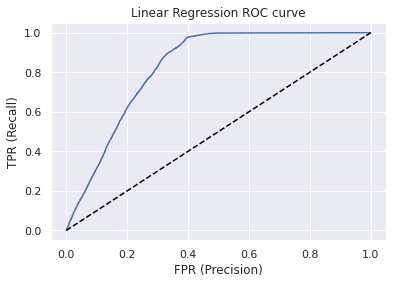

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, lr_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 8403  5578]
 [  324 13721]]


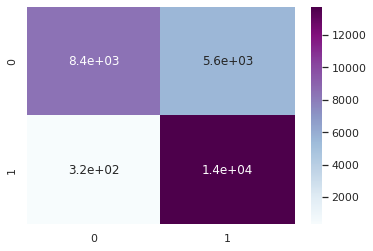

In [32]:
cm=confusion_matrix(ytest,pred)
print(cm)
sns.heatmap(cm,annot=True,cmap='BuPu')

**2.RandomForest Classifier**

In [33]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest=randomforest.fit(xtrain, ytrain)
y_pred = randomforest.predict(xtest)
RF_probability = randomforest.predict_proba(xtest)[:,1]



AUC_RF=roc_auc_score(y_pred,ytest)
acc_rf=accuracy_score(ytest,y_pred)
recall_rf=recall_score(ytest,y_pred)
precision_rf=precision_score(ytest,y_pred)
f1score_rf=f1_score(ytest,y_pred)

print(accuracy_score(y_pred,ytest))
print("ROC_AUC Score:",AUC_RF)

0.8078926710911296
ROC_AUC Score: 0.819463184503396


In [34]:
print(classification_report(y_pred,ytest))

              precision    recall  f1-score   support

           0       0.71      0.88      0.79     11321
           1       0.90      0.76      0.82     16705

    accuracy                           0.81     28026
   macro avg       0.81      0.82      0.81     28026
weighted avg       0.83      0.81      0.81     28026



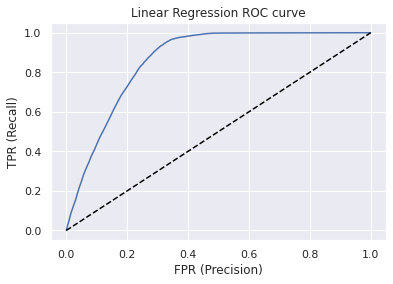

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, RF_probability)

plt.title('Linear Regression ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 9959  1362]
 [ 4022 12683]]


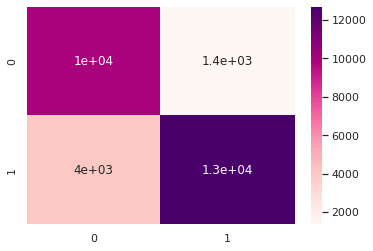

In [36]:
cm=confusion_matrix(y_pred,ytest)
print(cm)
sns.heatmap(cm,annot=True,cmap='RdPu')

**3. XGBClassifier**

In [37]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
XGB_fit=xgb.fit(xtrain, ytrain)
y_predict = XGB_fit.predict(xtest)
XGB_probability = XGB_fit.predict_proba(xtest)[:,1]

acc_xgb=accuracy_score(ytest,y_predict)
recall_xgb=recall_score(ytest,y_predict)
precision_xgb=precision_score(ytest,y_predict)
f1score_xgb=f1_score(ytest,y_predict)

AUC_xgb=roc_auc_score(y_predict,ytest)


print(accuracy_score(y_predict,ytest))
print("ROC_AUC Score:",AUC_xgb)

0.8018982373510312
ROC_AUC Score: 0.8242774302254495


In [38]:
print(classification_report(y_predict,ytest))

              precision    recall  f1-score   support

           0       0.67      0.91      0.77     10307
           1       0.93      0.74      0.83     17719

    accuracy                           0.80     28026
   macro avg       0.80      0.82      0.80     28026
weighted avg       0.84      0.80      0.81     28026



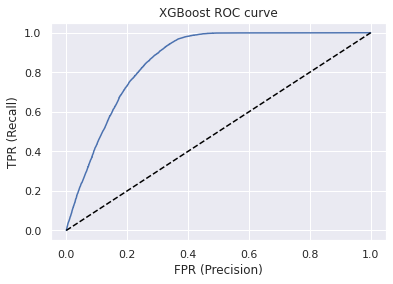

In [39]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest, XGB_probability)

plt.title('XGBoost ROC curve')
plt.xlabel('FPR (Precision)')
plt.ylabel('TPR (Recall)')

plt.plot(fpr,tpr)
plt.plot((0,1), ls='dashed',color='black')
plt.show()

[[ 9368  4613]
 [  939 13106]]


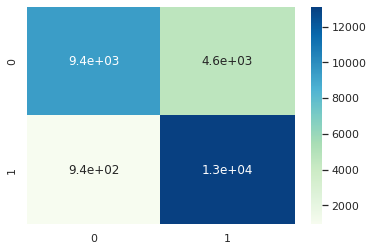

In [40]:
#it helps to identify how many values are classified correctly
cm=confusion_matrix(ytest,y_predict)
print(cm)
sns.heatmap(cm,annot=True,cmap='GnBu')

**Comparing the model**

In [41]:
ind=['Logistic regression','Randomforest','XGBClassifier']
data={"Accuracy":[acc_lr,acc_rf,acc_xgb],"Recall":[recall_lr,recall_rf,recall_xgb],"Precision":[precision_lr,precision_rf,precision_xgb],
    'f1_score':[f1score_lr,f1score_rf,f1score_xgb],"ROC_AUC":[AUC_LR,AUC_RF,AUC_xgb]}
result=pd.DataFrame(data=data,index=ind)
result

,Accuracy,Recall,Precision,f1_score,ROC_AUC
Logistic regression,0.789410,0.976931,0.710969,0.822997,0.836922
Randomforest,0.807893,0.903026,0.759234,0.824911,0.819463
XGBClassifier,0.801898,0.933143,0.739658,0.825211,0.824277


The ML model for the problem statement was created using python with the help of the dataset, and the ML model created with Random Forest and XGBClassifier models performed better than Logistics Regression model. Thus, for the given problem, the models created by Random Forest and XGBClassifier.

# Conclusion



*   Customers of age between 30 to 60 are more likely to buy insurance.

*  Customers with Driving License have higher chance of buying Insurance.

*  Customers with Vehicle_Damage are likely to buy insurance.
* The variable such as Age, Previously_insured,Annual_premium are more afecting the target variable.

* comparing ROC curve we can see that Random Forest model preform better. Because curves closer to the top-left corner, it indicate a better performance.


 

